In [94]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.interpolate import interp1d as LinearInterpolation

# Generate data
* either generate the data
* OR read it from csv

In [95]:
def get_data(read_file = False):
    filename = "mydata.csv"
    version = 1
    if read_file==False: #isfile(filename)==false
        print("generating data")
        ee = 0.0
        x = np.arange(-1-ee, 1+ee,0.01)
        y = x**2
        if version == 0:
            print("Do nothing special")
        elif  version ==1:
            y += y*np.random.rand( np.size(x))*0.5
            y += y*np.sin(-0.3+ np.pi*2*x*4)*0.25
            y += np.random.rand(np.size(x))*0.05
        elif  version ==2:
        
            # y += y.*rand(Float32, size(x)[1])*0.5;
            y += y*np.sin(np.pi*2*x*4)*0.25
        
        df = pd.DataFrame( {'x':x,'y':y})
        df.to_csv(filename)
    else:
        print("Reading file")
        df = pd.read_csv(filename)
        x = df["x"].values
        y = df["y"].values
    # end
    return x,y
# end

Reading file


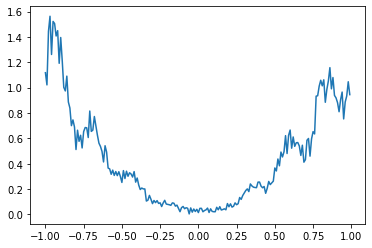

In [96]:
xpoints, ypoints = get_data(True)
plt.plot(xpoints,ypoints)


In [97]:
# x=1:0.25:5
# y = log.(x);
# x2 = 1:0.1:5
# interp_linear = LinearInterpolation(x,y);
# y2 = interp_linear.(x2);
# size(y2)
# scatter(x,y, label = "y")
# scatter!(x2,y2, label = "y2")


In [98]:
last_n = 5
n = ypoints.shape[0]
np.mean(ypoints[n-last_n:n])

0.9129658458677182

In [99]:
def mean_of_last_items(loss_values, last_n = 5):
    # get the average of the last 5 items in the list
    n = np.size(loss_values)
    if n<5:
        return 1
    else:
        return np.mean(loss_values[n-last_n:n])
    # end
# end

In [100]:
def numerical_derivative(f, x, dx=0.00001, min =-1, max = 1):
    if (x-dx) <min:
        x = min+dx
    elif (x+dx)>max:
        x = max-dx
    
    derivative = (f(x+dx) - f(x-dx))/(2*dx) 
    return derivative 
# end 

In [101]:
def x_still_changing(x_values):
    if len(x_values)<6:
        return True
    
    m = mean_of_last_items(x_values)
    v = x_values[-1]
    diff = abs(m-v)
    if diff<1e-4:
        return False
    else:
        return True
    # end
# end

In [102]:
def make_inter_function(x,y, xmin=-1, xmax=1):
    interp_linear = LinearInterpolation(x,y)
    xmax  = x.max()
    xmin = x.min()
    def f(x):
        x = np.array(x)
        mask = x<xmin
        x[mask] = xmin
        mask2 = x>xmax
        x[mask2] = xmax
        # if x<xmin:
            # x = xmin
        # if x > xmax:
            # x = xmax
        return interp_linear(x)
  
        
    # end
    return f
# end

In [103]:
f = make_inter_function(xpoints,ypoints)

In [104]:
f(0.1),  f(2), f(np.array([-2,-0.5,1,2]))

(array(0.02086084),
 array(0.01413564),
 array([1.11786333, 0.25197459, 0.94480447, 0.94480447]))

In [105]:
xpoints.max()

0.9900000000000018

In [106]:
def  plot_optimization_results(xs, f, name = ""):
    ys = f(xs)
    plt.scatter(xs,ys, lw = 4)

    ax = plt.gca()
    ax.set_title(f"Evaluted points values a function of iteration #.\n Using {name}")
    ax.plot(xs,ys, label = "Path")
    ax.plot(xpoints,ypoints, label = "True")
    plt.legend(loc = [-0.3, 0.8])
# end

In [107]:
def find_a_min_grad(funct_input, start = 0.95):
    x_i = start 
    step = 1e-2
    x_list = []
    x_list.append( x_i)
    for i in range( 3000):
        dydx = numerical_derivative(funct_input, x_i)
        if x_still_changing(x_list) == False:
            print(f"Found a min at {x_i}. Iteration {i}")
            return x_i,x_list
        # end     
        x_delta = -dydx*step # step in the negative gradient
        x_i = x_i+x_delta      
        x_list.append( x_i)
    # end
    print(f"Did NOT terminate. x =  {x_i}")
    return x_i,x_list
# end

In [108]:
x, xs = find_a_min_grad(f)

Found a min at 1.0912101287384115. Iteration 6


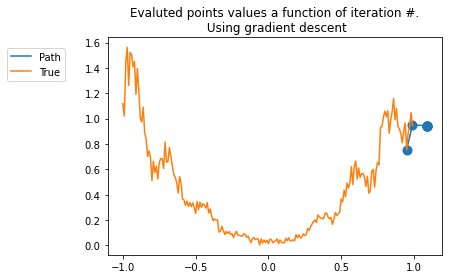

In [109]:
plot_optimization_results(xs, f,  "gradient descent")

In [110]:
def find_a_min_momentum(funct_input, start = 0.95):
    x_i = start 
    # println("argmin is $idx with x value of $x_i")
    step = 1e-2
    m_t = 0
    m_t_minus_1 = 0
    beta = 0.5
    eps_ = 1e-7
    x_list = []
    x_list.append( x_i)
    for i in range( 3000):
        # println("$x_i and $i")
        # get the gradient
        # dydx = f_dydx(x_i)
        dydx = numerical_derivative(funct_input, x_i)
        if x_still_changing(x_list) == False:
            print(f"Found a min at {x_i}. Iteration {i}")
            return x_i,x_list
        # end
        m_t = beta*m_t_minus_1+(1-beta)*dydx
        x_delta = -m_t*step # step in the negative gradient
        x_i = x_i+x_delta
        m_t_minus_1 = m_t
        x_list.append( x_i)
    # end
    print(f"Did NOT terminate. x =  {x_i}")
    return x_i,x_list
# end

Found a min at 0.9190620283223875. Iteration 16


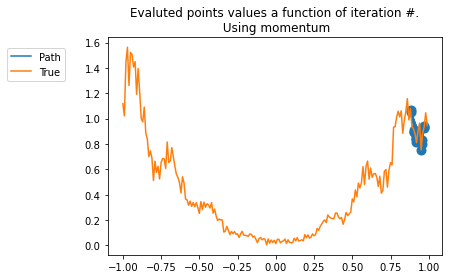

In [111]:
# @time x, xs = find_a_min_momentum(f);
x, xs = find_a_min_momentum(f)

plot_optimization_results(xs, f, "momentum")


In [112]:
def find_a_min_rmsp(funct_input, start = 0.95):   
    x_i = start 
    step = 1e-2 # basically the learning rate. 
    v_t = 0
    v_t_minus_1 = 0
    beta = 0.9
    eps_ = 1e-7
    x_list = []
    x_list.append( x_i)
    for i in range(3000):
        # get the gradient
        # dydx = f_dydx(x_i)
        dydx = numerical_derivative(funct_input, x_i)
        if x_still_changing(x_list) == False:
            print(f"Found a min at {x_i}. Iteration {i}")
            return x_i,x_list
        # end
        # m_t = beta*m_t_minus_1+(1-beta)*dydx
        v_t = beta*v_t_minus_1 +(1-beta)*dydx**2
        update_term = 1/(np.sqrt(v_t)+1e-9)*dydx
        x_delta = -update_term*step # step in the negative gradient
        x_i = x_i+x_delta
        v_t_minus_1 = v_t
        x_list.append( x_i)

    # end
    print(f"Did NOT terminate. x =  {x_i}")
    return x_i,x_list
# end

Found a min at 1.0113015065636604. Iteration 6


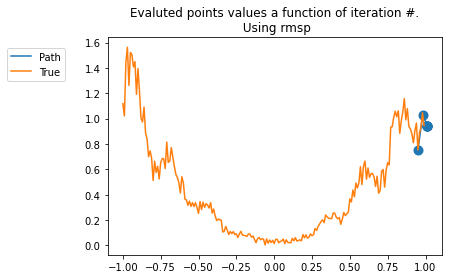

In [113]:
x, xs = find_a_min_rmsp(f)
plot_optimization_results(xs, f, "rmsp")


In [114]:
def find_a_min_adam(funct_input, start = 0.95):   
    x_i = start # trial_x[idx] # x sub i 
    step = 1e-2 # basically the learning rate. 
    v_t = 0
    v_t_minus_1 = 0
    m_t = 0
    m_t_minus_1 = 0
    beta_1 = 0.99 # for the momentum m_t 
    beta_2 = 0.99 # for the rmsprop v_t
    eps_ = 1e-7
    x_list = []
    for i in range(3000):
        # get the gradient
        dydx = numerical_derivative(funct_input, x_i)
        if x_still_changing(x_list) == False:
            print(f"Found a min at {x_i}. Iteration {i}")
            return x_i,x_list
        # end
        m_t = beta_1*m_t_minus_1+(1-beta_1)*dydx
        v_t = beta_2*v_t_minus_1 +(1-beta_2)*dydx**2
        
        m_t_hat = m_t/(1-beta_1)
        v_t_hat = v_t/(1-beta_2)
       

        update_term = m_t_hat/(np.sqrt(v_t_hat)+1e-9)*dydx
        x_delta = -update_term*step # step in the negative gradient
        x_i = x_i+x_delta
        v_t_minus_1 = v_t
        m_t_minus_1 = m_t

        x_list.append( x_i)


    # end
    print(f"Did NOT terminate. x =  {x_i}")
    return x_i,x_list
# end

Found a min at 0.033835139261890274. Iteration 153


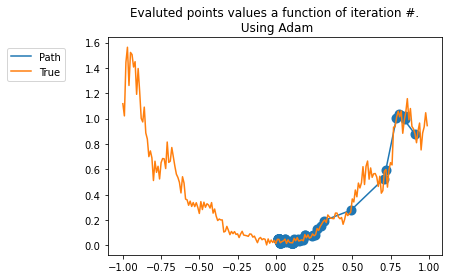

In [115]:
x, xs = find_a_min_adam(f)
plot_optimization_results(xs, f, "Adam")